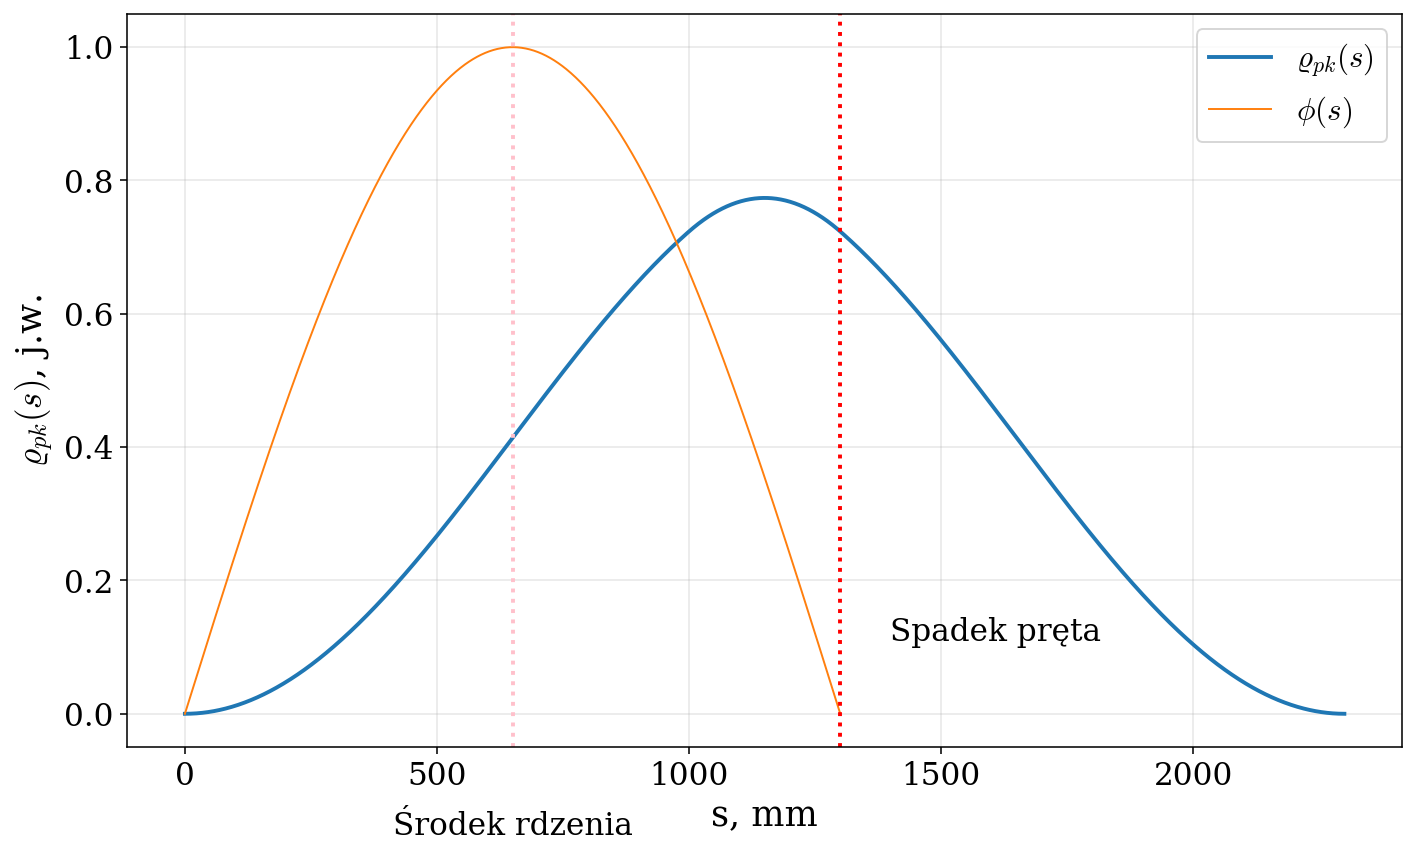

In [24]:
# ===============================================
# Wykres funkcji ρ_pk(z) wg definicji piecewise
# ===============================================
from __future__ import annotations
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

mpl.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['DejaVu Serif', 'CMU Serif', 'Libertinus Serif', 'Nimbus Roman'],
    'mathtext.fontset': 'cm',
    'axes.unicode_minus': False,
    'figure.dpi': 140, 'savefig.dpi': 300,
    'font.size': 16, 'axes.labelsize': 18
})
# --- stałe ---
H = 1.3  # m
L = 1.000   # m
#//////////////////////////////////
RHO_MAX_USER = 1.13  # $
#//////////////////////////////////
Kroczki = RHO_MAX_USER / 0.13
if isinstance(Kroczki, int):
   KROKI = Kroczki
else:
   KROKI = math.ceil(Kroczki)
#//////////////////////////////////

def rho_pk_from0_vec(z, H, L):
    z = np.asarray(z, dtype=float)
    y = np.zeros_like(z)
 
    pi_over_H = np.pi / H

    m2 = (z > 0) & (z <= L)
    m3 = (z > L) & (z <= H)
    m4 = (z > H) & (z <= H + L)

    y[m2] = (H/np.pi) * (np.sin(pi_over_H * (z[m2] - H/2)) + 1.0)
    y[m3] = (H/np.pi) * (np.sin(pi_over_H * (z[m3] - H/2))
                         - np.sin(pi_over_H * (z[m3] - H/2 - L)))
    y[m4] = (H/np.pi) * (1.0 - np.sin(pi_over_H * (z[m4] - H/2 - L)))
    return y
def phi_from_top(s, H):
    """Strumień wzdłuż osi liczonej od GÓRY rdzenia (s=0 na górnej krawędzi)."""
    s = np.asarray(s, dtype=float)
    out = np.zeros_like(s)
    m = (s >= 0) & (s <= H)
    out[m] = np.cos((np.pi / H) * (s[m] - H/2))
    return out
# --- siatka i wartości (W MM NA OSI) ---
z_mm = np.linspace(0.0, (H + L)*1000.0, 2001)
z_mm2 = np.linspace(0.0, (H+L)*1000.0, 2001  )
mask = H * 1000.0 >= z_mm2

   # mm
z_m  = z_mm / 1000.0                             # m (na wejście funkcji)
rpk  = rho_pk_from0_vec(z_m, H, L)
rpk2 = phi_from_top(z_m, H)                    # strumień (pomarańczowa) POPRAWNY# rysowanie jak wcześniej...
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)
ax.plot(z_mm, rpk,  lw=2, label=r"$\varrho_{pk}(s)$")
ax.plot(z_mm2[mask], rpk2[mask], lw=1, label=r"$\phi(s)$")

center_mm = (H/2)*1000.0
ax.axvline(center_mm, color='pink', lw=2, ls=':')
ax.annotate("Środek rdzenia", (center_mm, 0),
            xytext=(0, -50), textcoords='offset points',
            ha='center', va='top')

drop_mm = H*1000.0
ax.axvline(drop_mm, color='red', lw=2, ls=':')
ax.annotate("Spadek pręta", (drop_mm, 0),
            xytext=(80, 50), textcoords='offset points',
            ha='center', va='top')

ax.set_xlabel("s, mm")                    # to jest wsunięcie od góry, nie „z”
ax.set_ylabel(r"$\varrho_{pk}(s)$, j.w.")
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()

